<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_dl.png">


<center><h1 style="font-size:2em;color:#2467C0"> Clasificador Haar Cascade
 </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="figuras/portada.png" align="middle" style="width:550px;"/></td>
<td>
    
    
**Objetivo:**
    
    
En esta lección se mostrará el uso del clasificador Haar Cascade para encontrar  características faciales en  imagenes.
   
<br>
</td>
</tr>
</table>

# Cargar librerias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [2]:
def plt_imshow(title, image):
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

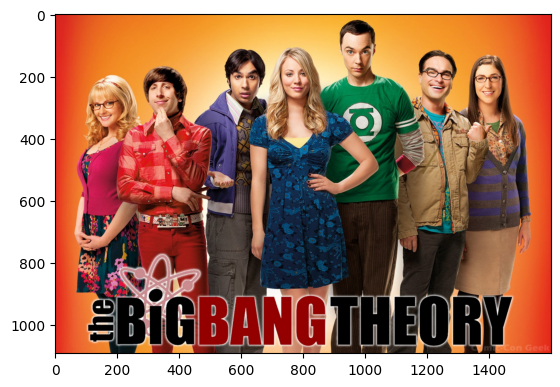

In [3]:
img = cv.imread('figuras/bbt.jpeg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

## a) Detección de rostros

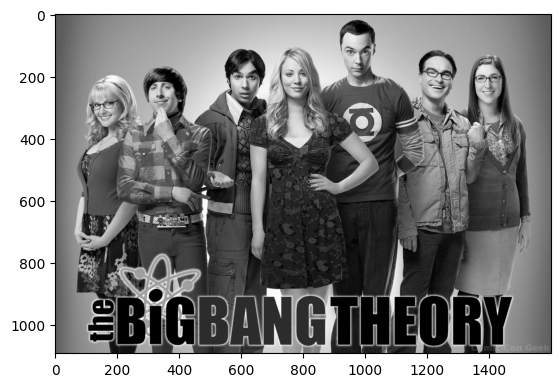

In [4]:
#Mostramos la imagen original
img = cv.imread('figuras/bbt.jpeg')
img_GRAY = cv.cvtColor( img, cv.COLOR_BGR2GRAY)
plt.imshow(img_GRAY, cmap='gray')
plt.show()

In [5]:
detector_rostros=cv.CascadeClassifier('datos/haarcascade_frontalface_default.xml')

In [6]:
rostros = detector_rostros.detectMultiScale(img_GRAY, 1.1, 20)
rostros

array([[ 912,   72,  129,  129],
       [1168,  140,  133,  133],
       [ 554,  158,  118,  118],
       [1338,  165,  112,  112],
       [ 284,  195,  108,  108],
       [ 717,  146,  120,  120]])

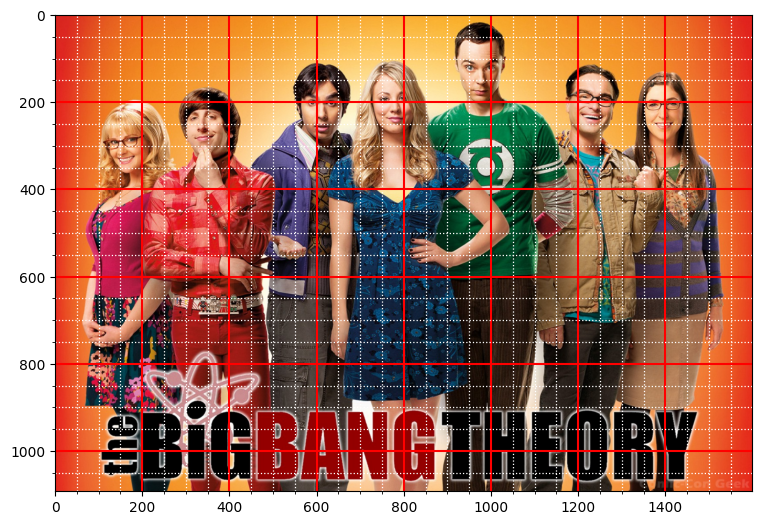

In [7]:
img = cv.imread('figuras/bbt.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(9,9))

ax.imshow(img)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='1.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.9', color='white')

(6, 4)

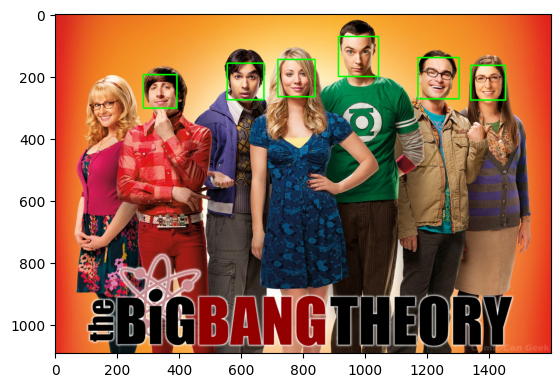

In [8]:
img = cv.imread('figuras/bbt.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

for fila, fila_valor in enumerate(rostros):
    cv.rectangle(img,(fila_valor[0],fila_valor[1]),(fila_valor[0] + fila_valor[2], fila_valor[1] + fila_valor[3]), (0,255,0), 4 )

plt.imshow(img)
plt.show        

rostros.shape

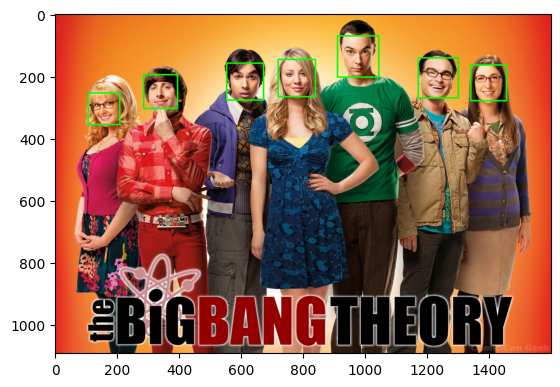

In [9]:
img = cv.imread('figuras/bbt.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
detector_rostros=cv.CascadeClassifier('datos/haarcascade_frontalface_default.xml')
rostros = detector_rostros.detectMultiScale(img_GRAY, 1.05, 20 )

for w,x,y,z in rostros:
        cv.rectangle(img,(w,x),(w + y, x + z), (0,255,0), 4 )
plt.imshow(img)
plt.show()

### b) Sonrisas 

In [10]:
detector_smile=cv.CascadeClassifier('datos/haarcascade_smile.xml')

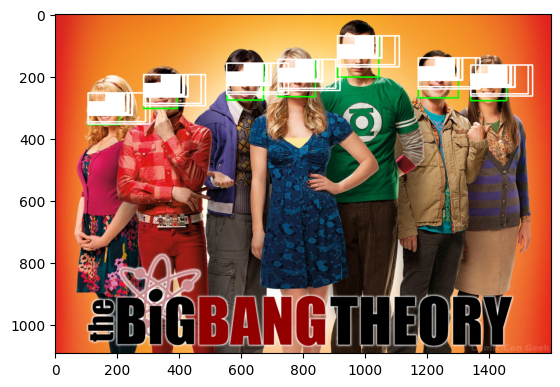

In [11]:
img = cv.imread('figuras/bbt.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

smile = detector_smile.detectMultiScale(img_GRAY, 1.04, 90 )

for x,y,w,h in rostros:
        cv.rectangle(img,(x,y),(x + w, y + h), (0,255,0), 4 )
        area = img_GRAY[ x:y+w, x:y+h]
        for x1,y1,w1,h1 in smile:
                cv.rectangle(img,(x,y),(x+w1,y+h1),(255,255,255),4)


plt.imshow(img)
plt.show()

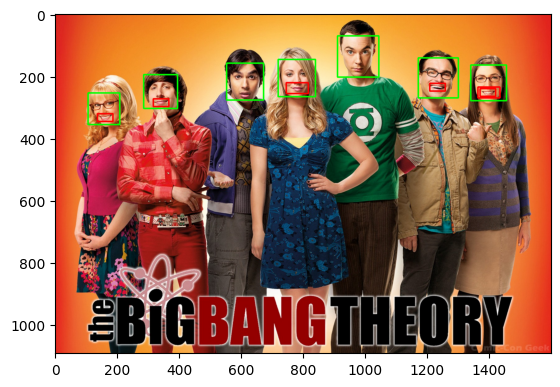

In [12]:
img = cv.imread('figuras/bbt.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

detector_rostros=cv.CascadeClassifier('datos/haarcascade_frontalface_default.xml')
rostros = detector_rostros.detectMultiScale(img_GRAY, 1.05, 20 )

detector_sonrisa=cv.CascadeClassifier('datos/haarcascade_smile.xml')
sonrisa = detector_sonrisa.detectMultiScale(img_GRAY, 1.4, 10)

for x,y,w,h in rostros:
    cv.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 4 )
    for x_s, y_s, w_s, h_s in sonrisa:
        if x_s >= x and y_s >= y and x_s+w_s <= (x+w) and y_s+h_s <= (y+h):
            cv.rectangle(img,(x_s,y_s), (x_s+w_s, y_s+h_s), (255,0,0), 4)

plt.imshow(img)
plt.show()

### c) Ojos

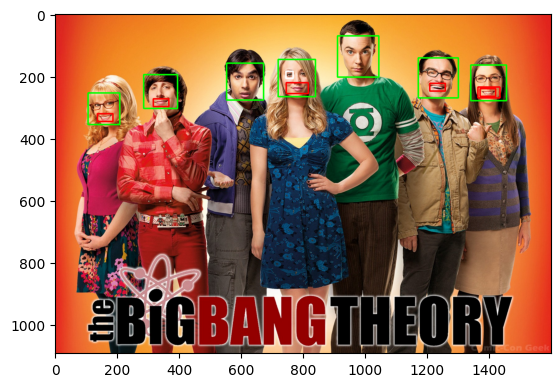

In [13]:
img = cv.imread('figuras/bbt.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

detector_rostros=cv.CascadeClassifier('datos/haarcascade_frontalface_default.xml')
rostros = detector_rostros.detectMultiScale(img_GRAY, 1.05, 20 )

detector_sonrisa=cv.CascadeClassifier('datos/haarcascade_smile.xml')
sonrisa = detector_sonrisa.detectMultiScale(img_GRAY, 1.4, 10)

detector_ojos=cv.CascadeClassifier('datos/haarcascade_eye.xml')
ojos = detector_ojos.detectMultiScale(img_GRAY,1.4,10)

for x,y,w,h in rostros:
    cv.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 4 )
    for x_s, y_s, w_s, h_s in sonrisa:
        if x_s >= x and y_s >= y and x_s+w_s <= (x+w) and y_s+h_s <= (y+h):
            cv.rectangle(img,(x_s,y_s), (x_s+w_s, y_s+h_s), (255,0,0), 4)
            for x_0, y_0, w_0, h_0 in ojos:
                if x_0 >= x and y_0 >= y and x_0+w_0 <= (x+w) and y_0+h_0 <= (y+h):
                    cv.rectangle(img,(x_0,y_0), (x_0+w_0, y_0+h_0), (255,255,255), 4)

plt.imshow(img)
plt.show()

# Reconocimiento de texto

https://github.com/UB-Mannheim/tesseract/wiki

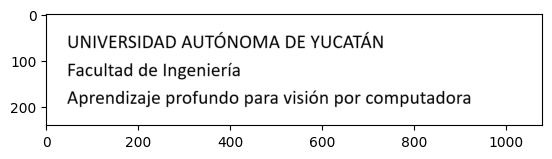

In [14]:
img = cv.imread('figuras/texto.PNG')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [15]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

In [16]:
texto = pytesseract.image_to_string(img)
print(texto)

UNIVERSIDAD AUTONOMA DE YUCATAN
Facultad de Ingenieria
Aprendizaje profundo para visidn por computadora



U 68 232 96 270 0
N 106 232 134 270 0
I 145 232 150 270 0
V 156 232 186 270 0
E 193 232 214 270 0
R 221 232 246 270 0
S 250 232 273 270 0
I 280 232 323 270 0
D 313 232 342 270 0
A 326 232 357 270 0
D 364 232 393 270 0
A 410 232 475 270 0
U 466 232 495 281 0
T 481 232 509 270 0
O 510 232 543 281 0
N 551 232 579 270 0
O 587 232 620 270 0
M 619 232 648 281 0
A 628 232 706 270 0
D 726 232 739 270 0
E 726 232 783 270 0
Y 801 232 827 270 0
U 833 232 861 270 0
C 869 232 896 270 0
A 899 232 930 270 0
T 927 232 955 270 0
A 952 232 984 281 0
N 990 232 1018 270 0
F 68 147 88 185 0
a 92 147 113 175 0
c 120 147 140 175 0
u 146 147 169 175 0
l 178 147 182 186 0
t 188 147 205 182 0
a 208 147 229 175 0
d 236 147 260 186 0
d 281 147 305 186 0
e 312 147 335 175 0
I 357 147 362 185 0
n 371 147 393 175 0
g 399 138 424 175 0
e 428 147 452 175 0
n 441 138 466 188 0
i 459 147 481 175 0
e 489 147 495 186 0
r 502 147 525 175 0
i 532 147 548 175 0
a 553 147 585 188 0
A 65 64 96 102 0
p 103 54 126 92 0
r 133 64 

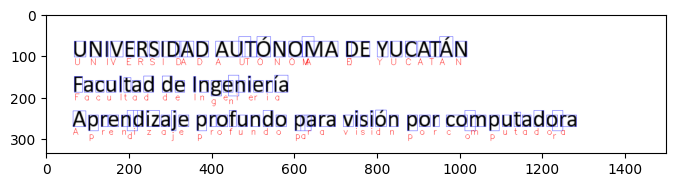

In [18]:
import imutils

img = cv.imread('figuras/texto.png')
img = imutils.resize(img, width=1500)
hImg, wImg, _ = img.shape

text = pytesseract.image_to_boxes(img,)

print(text) 
#print(text.splitlines())
for b in text.splitlines():
    b = b.split(' ')
    print(b)
    x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    cv.rectangle(img, (x, hImg - y), (w, hImg - h), (50, 50, 255), 1)
    cv.putText(img, b[0], (x, hImg - y + 19), cv.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 1)

plt.figure(figsize=(8,8))
plt.imshow(img)
plt.show()

In [19]:
from gtts import gTTS

img = cv.imread('figuras/texto.png')
texto =  pytesseract.image_to_string(img)

audio = gTTS(text = texto , lang = 'es')
audio.save("saved_audio_es.wav")